In [67]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
                      
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier

import nltk
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import Normalizer


from sklearn.model_selection import RandomizedSearchCV
import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
# path = r"/Users/charlotte/Desktop/BT4222/train_labelled_final.csv"
# reviews = pd.read_csv(path)
reviews = pd.read_csv('./train_labelled.csv', encoding= 'unicode_escape')

In [69]:
reviews.head()

,Restaurant,Review,Label,Stars,Date
0,Happy Tummy,"Fresh ingredients, friendly peeps and so much ...",1,5,2016-04-06T00:00:00
1,Cibo Italiano,A small selection of Italian wines by the glas...,1,4,2015-12-24T00:00:00
2,Yan kee Noodle House,The plus point is that the price remains the s...,1,4,2018-12-28T00:00:00
3,Clinton Street Baking Company & Restaurant,Same for more?I ordered what I thought was the...,1,2,2018-03-03T00:00:00
4,Song Fa Bak Kut Teh,I will probably get that again.Have been very ...,5,5,2019-01-05T00:00:00


In [70]:
reviews.Label.value_counts()

2    916
5    645
3    525
1    394
4    350
Name: Label, dtype: int64

In [71]:
# Cleaning the Data
def clean(data):

    # Removing leading and trailing white spaces
    data = str(data).strip()
    
    # Converting all text to lower case
    data = data.lower() 
    
    # add space for punctuation
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    translator.sub(' ', data)

    #remove punct
    data = re.sub('[^A-Za-z0-9]+', ' ', data)
    
    #keep english words
    data = re.sub(r'[^\x00-\x7F]+', '', data)
    
    #keep printable
    data = re.sub(f'[^{re.escape(string.printable)}]', '', data)

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(data)

    # Converting all text to base form
#     lemmatizer = WordNetLemmatizer()
#     tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
            
    # Removing Punctuation
#     translator = str.maketrans('', '', string.punctuation)
#     data = data.translate(translator)

         # Converting all numbers to words
#    word = data.split(' ')
#     p = inflect.engine()
#     word = ' '.join([i for i in word if not i.isdigit()])
#     word = re.sub(r'\d+', p.number_to_words(word) , word)    

    word = ' '.join([i for i in tokens if not i in stop_words])

    return word

# clean text data
reviews["Review_clean"] = reviews["Review"].apply(lambda x: clean(x))
reviews.head()

,Restaurant,Review,Label,Stars,Date,Review_clean
0,Happy Tummy,"Fresh ingredients, friendly peeps and so much ...",1,5,2016-04-06T00:00:00,fresh ingredients friendly peeps much cheaper ...
1,Cibo Italiano,A small selection of Italian wines by the glas...,1,4,2015-12-24T00:00:00,small selection italian wines glass beers well...
2,Yan kee Noodle House,The plus point is that the price remains the s...,1,4,2018-12-28T00:00:00,plus point price remains 4 per bowl
3,Clinton Street Baking Company & Restaurant,Same for more?I ordered what I thought was the...,1,2,2018-03-03T00:00:00,ordered thought signature omelette name
4,Song Fa Bak Kut Teh,I will probably get that again.Have been very ...,5,5,2019-01-05T00:00:00,probably get tempted pick soup base sell sure ...


In [72]:
reviews.Review_clean

0       fresh ingredients friendly peeps much cheaper ...
1       small selection italian wines glass beers well...
2                     plus point price remains 4 per bowl
3                 ordered thought signature omelette name
4       probably get tempted pick soup base sell sure ...
                              ...                        
2825                                   went weekday night
2826                      came birthday celebration mates
2827                                   caters vegetarians
2828    friend really wanted come back try foods unfor...
2829                          issue place drive take taxi
Name: Review_clean, Length: 2830, dtype: object

In [8]:
# def clean(data):
    
#     # Removing leading and trailing white spaces
# #     data = str(data).strip()

# # add space for punctuation
#     translator = re.compile('[%s]' % re.escape(string.punctuation))
#     translator.sub(' ', data)
#     # Converting all text to lower case
#     data = data.lower() 
    
#     #remove punct
#     data = re.sub('[^A-Za-z0-9]+', ' ', data)
    
#     #keep english words
#     data = re.sub(r'[^\x00-\x7F]+', '', data)
#     #keep printable
#     data = re.sub(f'[^{re.escape(string.printable)}]', '', data)
    
#     # Converting all numbers to words
# #     word = data.split(' ')
# #     p = inflect.engine()
# #     word = ' '.join([i for i in word if not i.isdigit()])
# #     word = re.sub(r'\d+', p.number_to_words(word) , word) 

# #     translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
# #     # Removing Punctuation
# #     #word = data.split(' ')
# #     translator = str.maketrans('', '', string.punctuation)
# #     data = data.translate(translator)

#     # Removing Stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = word_tokenize(data)
#     data = ' '.join([i for i in tokens if not i in stop_words])
    
#     # Converting all text to base form
#     lemmatizer = WordNetLemmatizer()
#     tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]

#     return data

# # clean text data
# df['review_clean'] = df['Review'].apply(lambda x: clean(x))
# df.head()



In [73]:
x = reviews.Review_clean
y = reviews.Label

In [74]:
# split x and y into training and testing sets
# stratify returns training and test subsets that have the same proportions of class labels as the input dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify = y)

In [75]:
# examine the object shapes
print(y_train.value_counts())
print(y_test.value_counts())

2    687
5    484
3    394
1    295
4    262
Name: Label, dtype: int64
2    229
5    161
3    131
1     99
4     88
Name: Label, dtype: int64


In [12]:
## Building the vocabulary

In [13]:
vect = CountVectorizer()

In [14]:
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)

# only transform x_test
x_test_dtm = vect.transform(x_test)

In [15]:
# examine the shapes: rows are documents, columns are terms (aka "tokens" or "features")
print(x_train_dtm.shape)
print(x_test_dtm.shape)

(2122, 4593)
(708, 4593)


In [16]:
# examine the last 50 features
print(vect.get_feature_names()[-50:])

['worried', 'worse', 'worst', 'worth', 'worthy', 'would', 'wow', 'wowed', 'wrap', 'wrapped', 'write', 'writing', 'written', 'wrong', 'xie', 'xlb', 'xlbs', 'xo', 'ya', 'yahoo', 'yakitori', 'yam', 'yamazaki', 'yang', 'yarra', 'year', 'years', 'yelp', 'yelper', 'yeoh', 'yes', 'yesterday', 'yet', 'yielding', 'yo', 'yogurt', 'yolk', 'yong', 'york', 'yuan', 'yuen', 'yum', 'yummier', 'yumminess', 'yummmy', 'yummy', 'yuzu', 'zach', 'zealand', 'zhajing']


# Comparing the accuracy of different approaches

In [17]:
vects = [CountVectorizer(),TfidfVectorizer()]
vectnames = ["Count Vect","Tfidf Vect"]


clfs = [BaggingClassifier(RandomForestClassifier()), MultinomialNB(),LinearSVC(),LogisticRegression(),RandomForestClassifier(),linear_model.SGDClassifier(), GradientBoostingClassifier()]
clfnames = ["bagging random forest", "Naive Bayes","Linear SVM","Logistic Regression","Random Forest","Stochastic Gradient Descent", "Gradient Boosting"]

In [18]:
#building a pipeline

for vectname, vect, in zip(vectnames, vects):

    for clfname, clf in zip(clfnames, clfs):
        pipe = Pipeline([
            ('vect', vect),
            ('clf', clf),
        ]
        )       

        pipe.fit(x_train, y_train)
        pred = pipe.predict(x_test)
        train_acc = metrics.accuracy_score(y_train, pipe.predict(x_train))
        test_acc = metrics.accuracy_score(y_test, pred)
        #roc_auc = metrics.roc_auc_score(y_test, pred)
        print("{} + {} - train acc: {} test acc: {} ".format(vectname, clfname, train_acc, test_acc))
        #scores = cross_val_score(pipe, x, y,scoring='roc_auc')
        #print(scores.mean())

    

Count Vect + bagging random forest - train acc: 0.9476908576814326 test acc: 0.6497175141242938 
Count Vect + Naive Bayes - train acc: 0.9349670122525919 test acc: 0.6991525423728814 
Count Vect + Linear SVM - train acc: 0.9971724787935909 test acc: 0.693502824858757 
Count Vect + Logistic Regression - train acc: 0.9778510838831291 test acc: 0.7274011299435028 
Count Vect + Random Forest - train acc: 0.9835061262959472 test acc: 0.6370056497175142 
Count Vect + Stochastic Gradient Descent - train acc: 0.9985862393967955 test acc: 0.6949152542372882 
Count Vect + Gradient Boosting - train acc: 0.8543826578699341 test acc: 0.693502824858757 
Tfidf Vect + bagging random forest - train acc: 0.9495758718190387 test acc: 0.6596045197740112 
Tfidf Vect + Naive Bayes - train acc: 0.8619227144203582 test acc: 0.6257062146892656 
Tfidf Vect + Linear SVM - train acc: 0.9962299717247879 test acc: 0.7274011299435028 
Tfidf Vect + Logistic Regression - train acc: 0.8920829406220546 test acc: 0.69067

In [19]:
# doing randomised search 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])


parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__analyzer':['char', 'word', 'char_wb'],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__binary': [True, False],
    'tfidf__norm': [None, 'l1', 'l2'], 
    'lr__dual': [True,False],
    'lr__max_iter': [100,200, 500],
    'lr__C' :np.logspace(0, 4, num=10)
  
    
}



random =RandomizedSearchCV(pipe, parameters, cv=5, n_jobs=2)

start_time = time.time()
random_result = random.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

pred = random.predict(x_test)
test_acc = metrics.accuracy_score(y_test, pred)
#roc_auc = metrics.roc_auc_score(y_test, pred)
pre_macro = metrics.precision_score(y_test, pred, average="macro")
recall_macro = metrics.recall_score(y_test, pred, average="macro")
f1_macro = metrics.f1_score(y_test, pred, average="macro")


print("test acc: {} recall: {} f1: {}".format(test_acc, recall_macro, f1_macro))


Best: 0.722903 using {'tfidf__norm': 'l1', 'tfidf__ngram_range': (1, 3), 'tfidf__max_df': 0.25, 'tfidf__binary': False, 'tfidf__analyzer': 'word', 'lr__max_iter': 500, 'lr__dual': True, 'lr__C': 464.15888336127773}
Execution time: 17.551498889923096 ms
test acc: 0.7175141242937854 recall: 0.704016716695835 f1: 0.7054281635251458


/Users/charlotte/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75, norm= 'l2', binary = True, analyzer = 'word')
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)


lr = LogisticRegression(max_iter = 100, dual = False, C = 10000)
lr.fit(x_train_dtm, y_train)
y_pred_class = lr.predict(x_test_dtm)

# Get the training accuracy
print('Training Accuracy: ', metrics.accuracy_score(y_train, lr.predict(x_train_dtm)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))


Training Accuracy:  1.0
Test Accuracy:  0.7274011299435028


In [21]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC



vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75, norm= 'l2', binary = True, analyzer = 'word')
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)


lr = OneVsRestClassifier(SVC())
lr.fit(x_train_dtm, y_train)
y_pred_class = lr.predict(x_test_dtm)

# Get the training accuracy
print('Training Accuracy: ', metrics.accuracy_score(y_train, lr.predict(x_train_dtm)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Training Accuracy:  0.974081055607917
Test Accuracy:  0.7033898305084746


In [22]:
## RNN

In [76]:
# Import necessary libraries
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.models import Model
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.models import Sequential

In [77]:
# Build input sequence for running the model
# max_len = 150
num_words = 1000
tok = Tokenizer(num_words= num_words)
tok.fit_on_texts(x_train)
word_idx = tok.word_index

In [78]:
# Transforming to matrix
trainmatrix = tok.texts_to_matrix(x_train)
testmatrix = tok.texts_to_matrix(x_test)

In [79]:
encoder = LabelEncoder()
encoder.fit(y_train)
trainlabels = encoder.transform(y_train)
testlabels = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
num_classes

6

In [81]:
y_train = to_categorical(trainlabels, num_classes)
y_test = to_categorical(testlabels, num_classes)

In [82]:
model= Sequential()
model.add(Dense(512, input_shape=(num_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [83]:
# Build and compile the model
model.compile(loss='binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])    
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_6 (Activation)    (None, 6)                 0         
Total params: 515,590
Trainable params: 515,590
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Train the model
model.fit(trainmatrix,y_train,validation_split = 0.2, 
           batch_size=32, epochs=5, 
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]
         )



Train on 1697 samples, validate on 425 samples
Epoch 1/5
1697/1697 [==============================] - 1s 338us/step - loss: 0.3950 - accuracy: 0.8396 - val_loss: 0.3422 - val_accuracy: 0.8569
Epoch 2/5
1697/1697 [==============================] - 0s 134us/step - loss: 0.2631 - accuracy: 0.8883 - val_loss: 0.2559 - val_accuracy: 0.8875
Epoch 3/5
1697/1697 [==============================] - 0s 130us/step - loss: 0.1605 - accuracy: 0.9398 - val_loss: 0.2244 - val_accuracy: 0.9043
Epoch 4/5
1697/1697 [==============================] - 0s 119us/step - loss: 0.1027 - accuracy: 0.9664 - val_loss: 0.2243 - val_accuracy: 0.9102
Epoch 5/5
1697/1697 [==============================] - 0s 130us/step - loss: 0.0706 - accuracy: 0.9805 - val_loss: 0.2280 - val_accuracy: 0.9133


In [85]:
# Evaluate results for testing data
accr = model.evaluate(testmatrix,y_test)

708/708 [==============================] - 0s 38us/step


In [86]:
# Print evaluation results
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.244
  Accuracy: 0.911


In [87]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(8, 
                    kernel_initializer=init_mode, 
                    activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10) 
# use verbose=0 if you do not want to see progress



In [88]:
# Use scikit-learn to grid search 

activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [89]:
from sklearn.model_selection import GridSearchCV

# grid search epochs, batch size
epochs = [1, 10] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(trainmatrix, y_train) 



##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (6,)

In [56]:

vocab_size = 10000
embedding_dim = 16
max_length = 250
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.8

In [59]:
import csv 
sentences = []
labels = []

with open('./train_labelled.csv', 'r') as csvfile:
  
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

TypeError: 'WordListCorpusReader' object is not iterable

In [ ]:
train_size = int(training_portion * len(labels))

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

In [91]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(reviews.Review_clean.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 5407 unique tokens.


In [93]:
from keras.preprocessing.sequence import pad_sequences


X = tokenizer.texts_to_sequences(reviews.Review_clean.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2830, 250)


In [94]:
Y = pd.get_dummies(reviews.Label).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2830, 5)


In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2547, 250) (2547, 5)
(283, 250) (283, 5)


In [100]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/Users/charlotte/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2292 samples, validate on 255 samples
Epoch 1/5
2292/2292 [==============================] - 9s 4ms/step - loss: 1.5516 - accuracy: 0.3189 - val_loss: 1.5122 - val_accuracy: 0.3608
Epoch 2/5
2292/2292 [==============================] - 10s 4ms/step - loss: 1.4002 - accuracy: 0.4136 - val_loss: 1.2457 - val_accuracy: 0.5569
Epoch 3/5
2292/2292 [==============================] - 10s 4ms/step - loss: 1.0132 - accuracy: 0.6270 - val_loss: 0.9612 - val_accuracy: 0.6314
Epoch 4/5
2292/2292 [==============================] - 9s 4ms/step - loss: 0.6453 - accuracy: 0.8032 - val_loss: 0.8047 - val_accuracy: 0.7451
Epoch 5/5
2292/2292 [==============================] - 10s 4ms/step - loss: 0.3730 - accuracy: 0.8887 - val_loss: 0.6870 - val_accuracy: 0.7608


In [102]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

283/283 [==============================] - 0s 949us/step
Test set
  Loss: 0.949
  Accuracy: 0.661


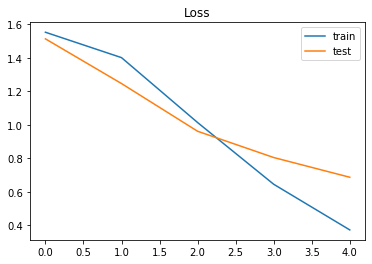

In [103]:

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

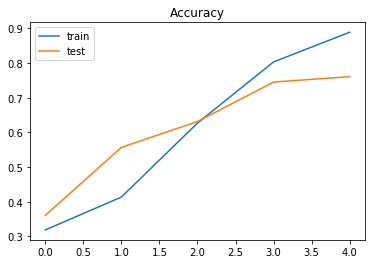

In [106]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [142]:
new_complaint = ['get full service menu decent prices pretty expensive']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Price', 'Taste', 'Service', 'Ambience', 'Others']
print(pred, labels[np.argmax(pred)])

[[0.6997855  0.00070216 0.27223322 0.02603481 0.00124426]] Price


In [139]:
reviews.Review_clean[5]

'get full service menu decent prices pretty expensive'

In [165]:
ans = []

for i in reviews.Review_clean:
    new_complaint = [i]
    
    seq = tokenizer.texts_to_sequences(new_complaint)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    labels = ['1', '2', '3', '4', '5']
    
    #print(pred, labels[np.argmax(pred)])
    #print(labels[np.argmax(pred)])
    ans.append(labels[np.argmax(pred)])
    

In [166]:
reviews['Outcome'] = ans

In [167]:
reviews.head()

,Restaurant,Review,Label,Stars,Date,Review_clean,Outcome
0,Happy Tummy,"Fresh ingredients, friendly peeps and so much ...",1,5,2016-04-06T00:00:00,fresh ingredients friendly peeps much cheaper ...,1
1,Cibo Italiano,A small selection of Italian wines by the glas...,1,4,2015-12-24T00:00:00,small selection italian wines glass beers well...,2
2,Yan kee Noodle House,The plus point is that the price remains the s...,1,4,2018-12-28T00:00:00,plus point price remains 4 per bowl,1
3,Clinton Street Baking Company & Restaurant,Same for more?I ordered what I thought was the...,1,2,2018-03-03T00:00:00,ordered thought signature omelette name,1
4,Song Fa Bak Kut Teh,I will probably get that again.Have been very ...,5,5,2019-01-05T00:00:00,probably get tempted pick soup base sell sure ...,5


In [169]:
confusion_matrix = pd.crosstab(reviews['Label'], reviews['Outcome'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3    4    5
Actual                            
1          350   21    4    4   15
2            7  886    0    4   19
3            2    9  498    2   14
4           16    6   22  268   38
5           16   44   21   15  549
